In [ ]:
!pip install -q insightface
!pip install -q onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
from insightface.app import FaceAnalysis

# Initialize RetinaFace detector
app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0)

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:06<00:00, 43991.83KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt -O /content/deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel -O /content/res10_300x300_ssd_iter_140000.caffemodel


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


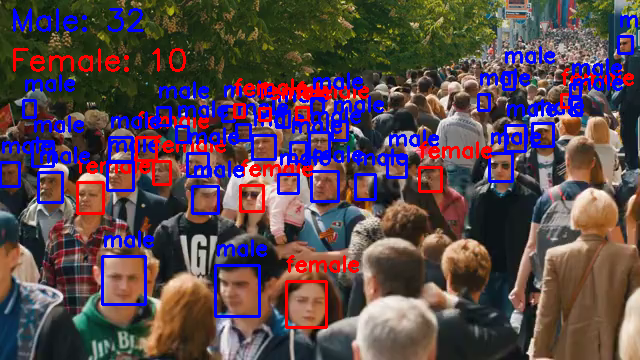

Frame 0 - Males: 32, Females: 10


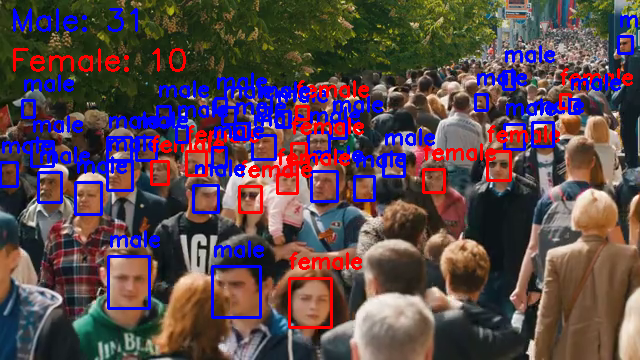

Frame 1 - Males: 31, Females: 10


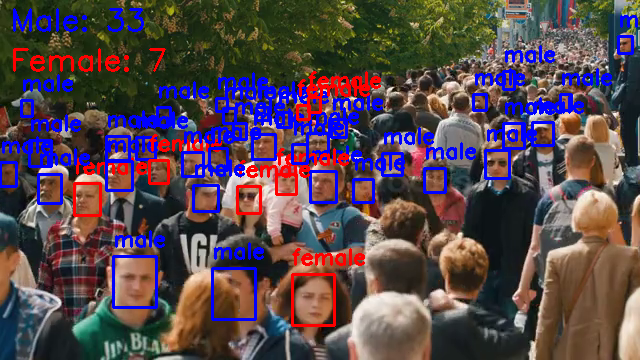

Frame 2 - Males: 33, Females: 7


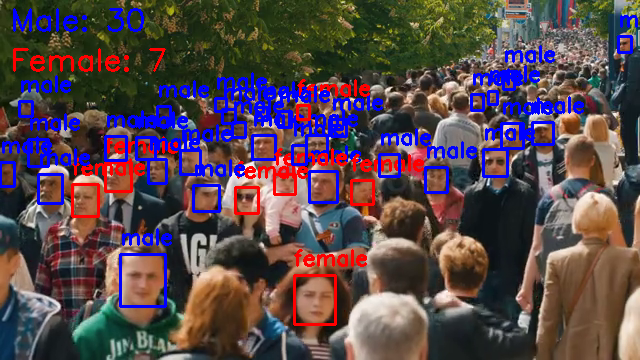

Frame 3 - Males: 30, Females: 7


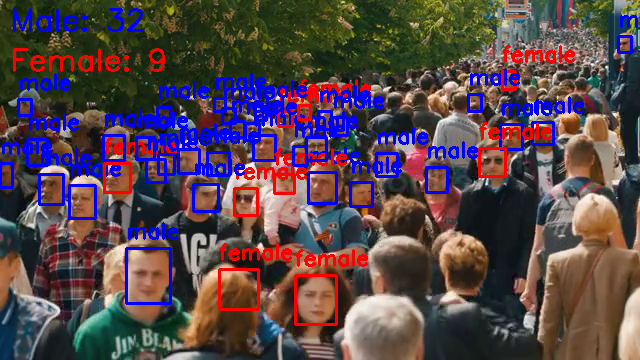

Frame 4 - Males: 32, Females: 9


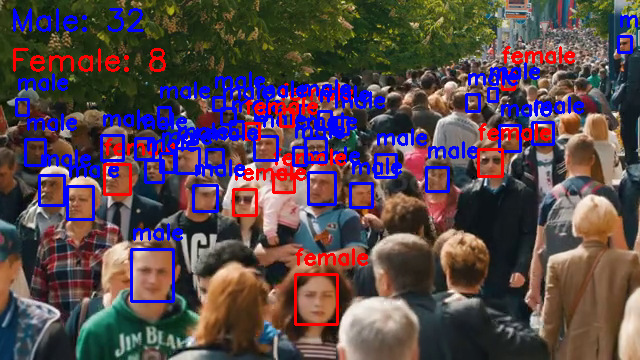

Frame 5 - Males: 32, Females: 8


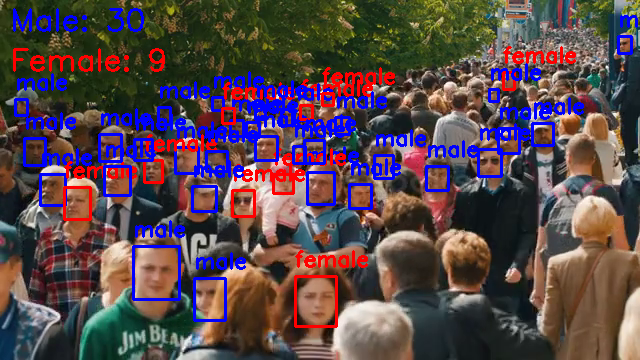

Frame 6 - Males: 30, Females: 9


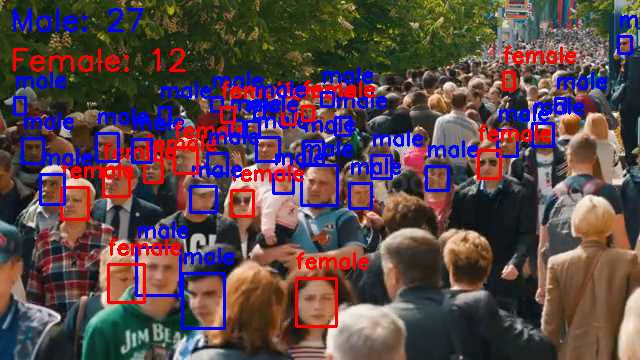

Frame 7 - Males: 27, Females: 12


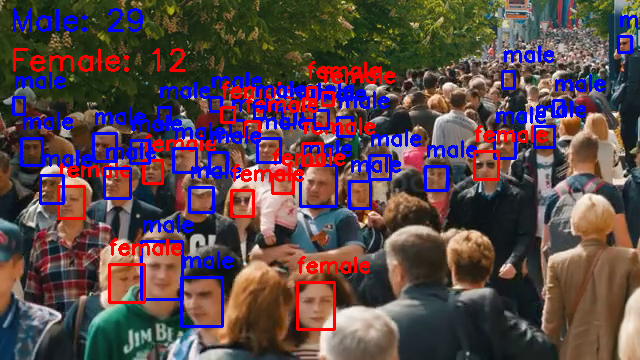

Frame 8 - Males: 29, Females: 12


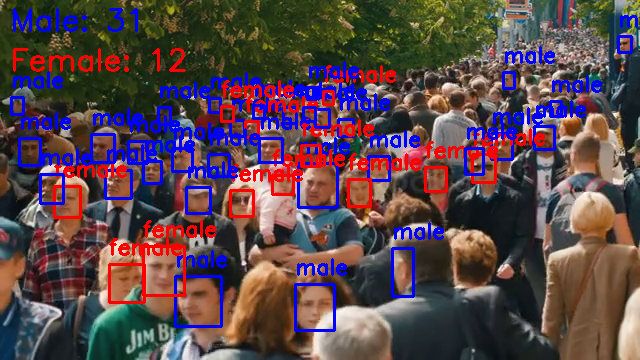

Frame 9 - Males: 31, Females: 12

Pseudo-Accuracy based on confidence >= 80%: 48.64%


In [ ]:
!pip install -q insightface
import cv2
import torch
import numpy as np
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor
from torchvision import transforms
from google.colab.patches import cv2_imshow
from insightface.app import FaceAnalysis
from torchvision.ops import box_iou

# Initialize the models
model_name = "rizvandwiki/gender-classification"
model = ViTForImageClassification.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std),
])

face_net = cv2.dnn.readNetFromCaffe(
    "/content/deploy.prototxt",
    "/content/res10_300x300_ssd_iter_140000.caffemodel"
)

app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0)

# Load the video file
video_path = "/content/drive/MyDrive/crowd.mp4"
cap = cv2.VideoCapture(video_path)
frame_count = 0
max_frames = 10  # Number of frames to process

# Function to detect faces using RetinaFace
def get_boxes_from_retina(frame):
    faces = app.get(frame)
    boxes = []
    for face in faces:
        x1, y1, x2, y2 = face.bbox.astype(int)
        boxes.append([x1, y1, x2, y2])
    return boxes

# Function to detect faces using OpenCV DNN
def get_boxes_from_opencv(frame):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
    face_net.setInput(blob)
    detections = face_net.forward()
    boxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.6:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            boxes.append(box.astype(int).tolist())
    return boxes

# Merge boxes from both detectors using IOU
def merge_boxes(boxes1, boxes2, iou_threshold=0.3):
    b1 = torch.tensor(boxes1)
    b2 = torch.tensor(boxes2)
    if len(b1) == 0:
        return boxes2
    if len(b2) == 0:
        return boxes1

    iou = box_iou(b1, b2)
    keep_b2 = ~iou.max(0).values.gt(iou_threshold)
    combined = boxes1 + [boxes2[i] for i, keep in enumerate(keep_b2) if keep]
    return combined

# Main processing loop
while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    (h, w) = frame.shape[:2]

    male_count = 0
    female_count = 0

    boxes_opencv = get_boxes_from_opencv(frame)
    boxes_retina = get_boxes_from_retina(frame)

    all_boxes = merge_boxes(boxes_opencv, boxes_retina)

    for (x1, y1, x2, y2) in all_boxes:
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w, x2), min(h, y2)

        face = frame[y1:y2, x1:x2]
        if face.size == 0:
            continue

        face_pil = Image.fromarray(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        face_tensor = transform(face_pil).unsqueeze(0)

        with torch.no_grad():
            outputs = model(face_tensor)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)
            pred = torch.argmax(probs).item()
            label = model.config.id2label[pred]

        if label == "male":
            male_count += 1
        else:
            female_count += 1

        color = (255, 0, 0) if label == "Male" else (0, 0, 255)
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    cv2.putText(frame, f'Male: {male_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(frame, f'Female: {female_count}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2_imshow(frame)
    print(f"Frame {frame_count} - Males: {male_count}, Females: {female_count}")  # Print the count for the current frame
    frame_count += 1

cap.release()
